In [8]:
%load_ext autoreload
%autoreload 2

import pyleoclim as pyleo
from pyleoclim import tests
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
soi_data = tests.load_dataset('soi', skiprows=1)
soi_data['Date'] = pd.to_datetime(soi_data['Date'], format='%Y%m')
nt = len(soi_data)
to = np.linspace(1951, 2020-1/12, nt)
Xo = soi_data['Value'].values
ts = pyleo.Series(time=to, value=Xo, time_name='Year', time_unit='AD', value_name='SOI', value_unit='K', label='SOI')
psd_mtm = ts.spectral(method='mtm')
psd_wwz = ts.spectral(settings={'nMC': 0})
scal_wwz = ts.wavelet(settings={'nMC': 0})

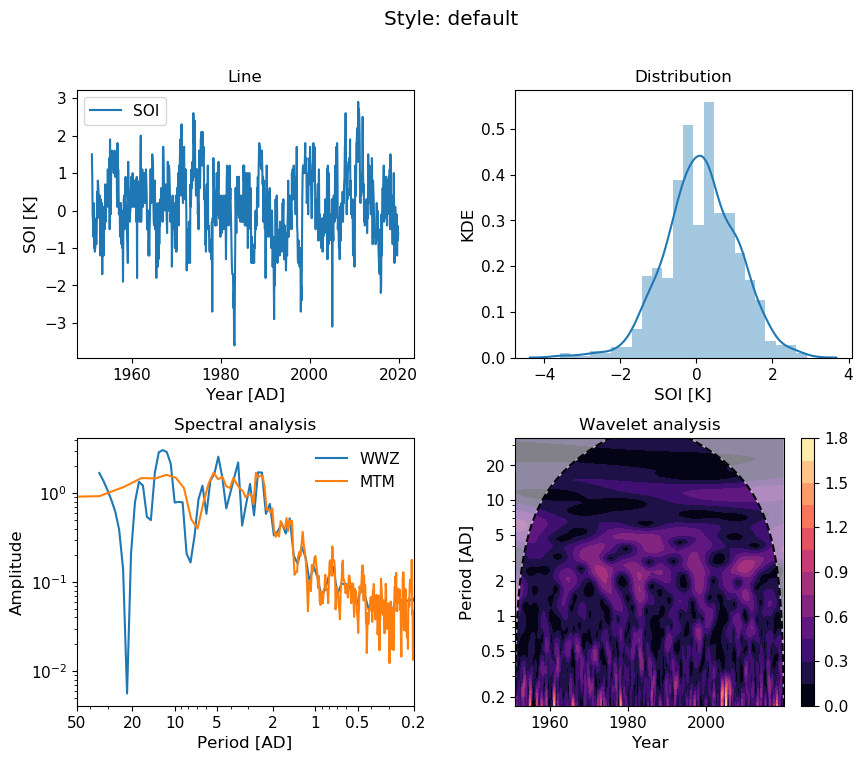

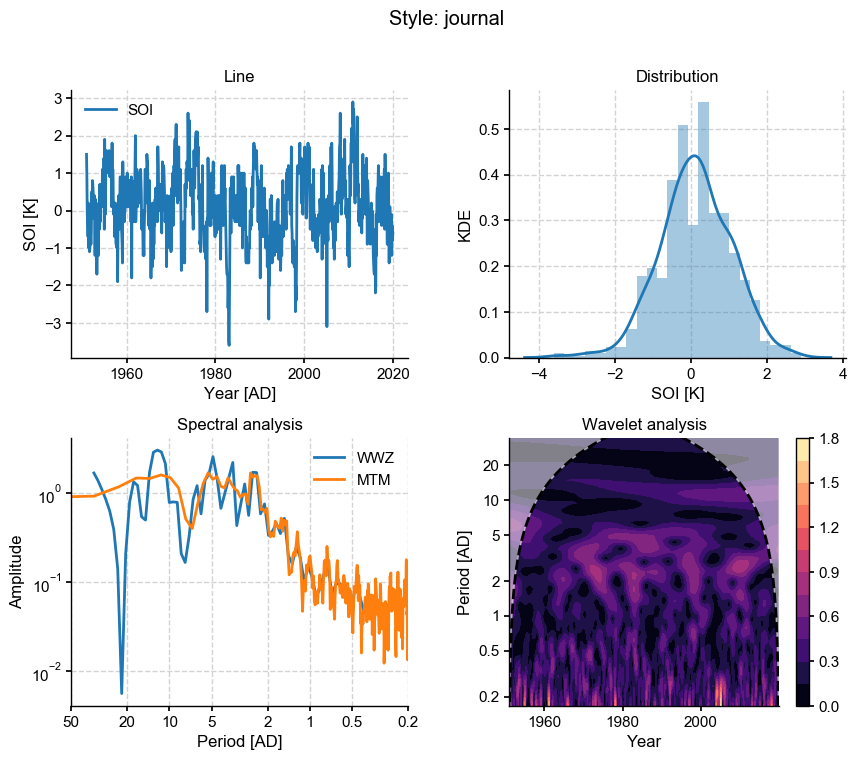

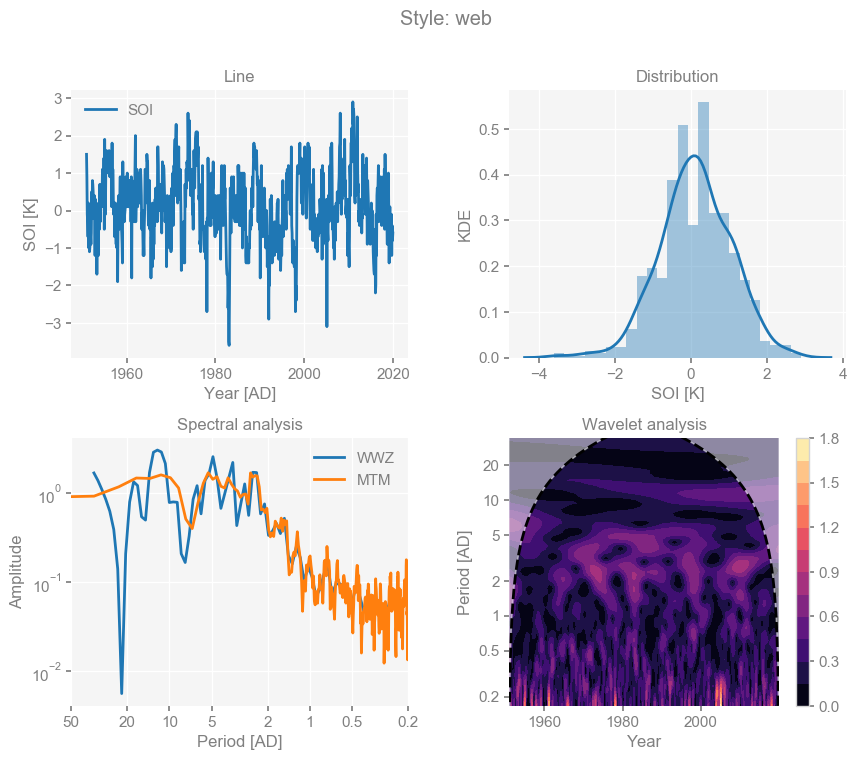

In [17]:
for style in ['default', 'journal', 'web']:
    pyleo.set_style(style, font_scale=1)
    
    fig = plt.figure(figsize=[10, 8])
    gs = gridspec.GridSpec(2, 2)
    gs.update(wspace=0.3, hspace=0.3) 
    
    ax1 = plt.subplot(gs[0, 0])
    ax1 = ts.plot(title='Line', ax=ax1)
    
    ax2 = plt.subplot(gs[0, 1])
    ax2 = ts.distplot(title='Distribution', ax=ax2)
    
    ax3 = plt.subplot(gs[1, 0])
    ax3 = psd_wwz.plot(title='Spectral analysis', ax=ax3, label='WWZ')
    ax3 = psd_mtm.plot(ax=ax3, label='MTM')
    
    ax4 = plt.subplot(gs[1, 1])
    ax4 = scal_wwz.plot(title='Wavelet analysis', ax=ax4)
    fig.suptitle(f'Style: {style}')
    pyleo.showfig(fig)

Directory created at: "figs/exp001"
Figure saved at: "figs/exp001/ts_grid.pdf"


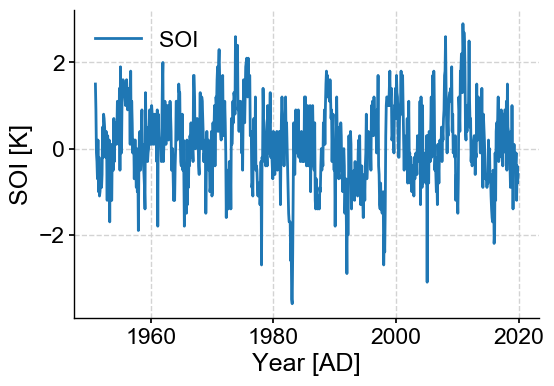

Figure saved at: "figs/exp001/ts_nogrid.pdf"


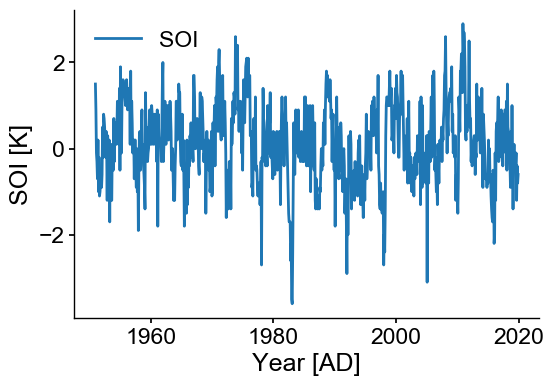

In [19]:
for suffix in ['grid', 'nogrid']:
    pyleo.set_style(f'journal_{suffix}')
    fig, ax = ts.plot(figsize=[6, 4], savefig_settings={'path': f'./figs/exp001/ts_{suffix}.pdf'})
    pyleo.showfig(fig)

Figure saved at: "figs/exp001/wavelet_spines.pdf"


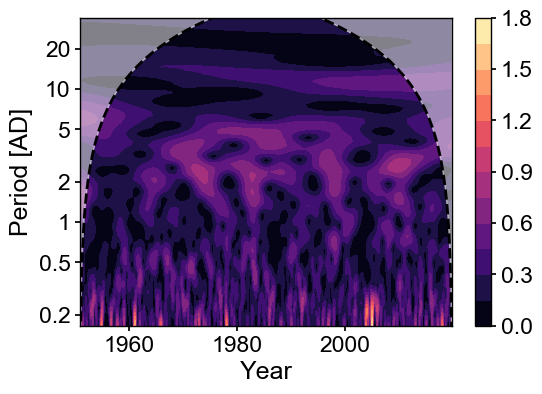

Figure saved at: "figs/exp001/wavelet_nospines.pdf"


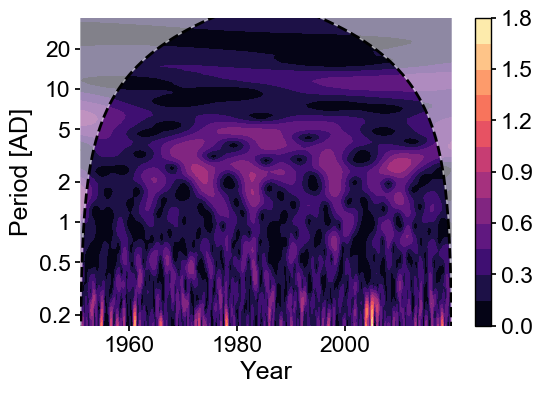

In [20]:
for suffix in ['spines', 'nospines']:
    pyleo.set_style(f'journal_{suffix}')
    fig, ax = scal_wwz.plot(figsize=[6, 4], savefig_settings={'path': f'./figs/exp001/wavelet_{suffix}.pdf'})
    pyleo.showfig(fig)